In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [3]:
from qiskit import *

In [4]:
IBMQ.save_account('YourKeyHere')

/home/stark/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
qr = QuantumRegister(2)

In [7]:
cr = ClassicalRegister(2)

In [8]:
circuit = QuantumCircuit(qr, cr)

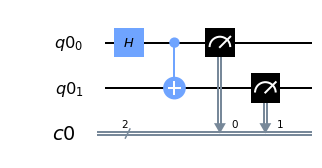

In [29]:
circuit.draw(output='mpl')

In [10]:
circuit.h(qr[0])

In [11]:
circuit.cx(qr[0], qr[1])

In [12]:
circuit.measure(qr, cr)

In [13]:
simulator = Aer.get_backend('qasm_simulator')

In [14]:
result = execute(circuit, backend=simulator).result()

In [15]:
from qiskit.tools.visualization import plot_histogram

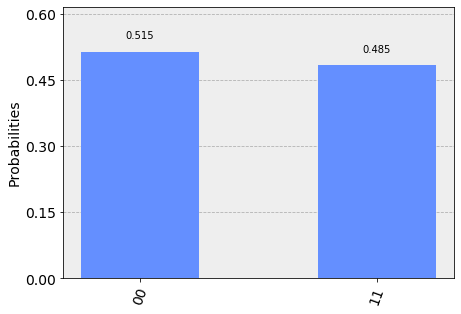

In [16]:
plot_histogram(result.get_counts(circuit))

In [17]:
IBMQ.load_account()

/home/stark/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider = IBMQ.get_provider('ibm-q')

In [19]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [20]:
job = execute(circuit, backend=qcomp)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
job_monitor(job)

Job Status: job has successfully run


In [28]:
result = job.result()

Result(backend_name='ibmq_16_melbourne', backend_version='1.1.0', date=datetime.datetime(2019, 9, 20, 11, 41, 43, tzinfo=tzutc()), execution_id='95adc148-db9b-11e9-bb4f-60a44c62b5b4', header=Obj(backend_name='ibmq_16_melbourne', backend_version='1.0.0'), job_id='unknown', qobj_id='3c91ab23-a036-4960-af13-c2bc4dcb6fc5', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=505, 0x1=62, 0x2=31, 0x3=426)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=14, name='circuit0', qreg_sizes=[['q', 14]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)

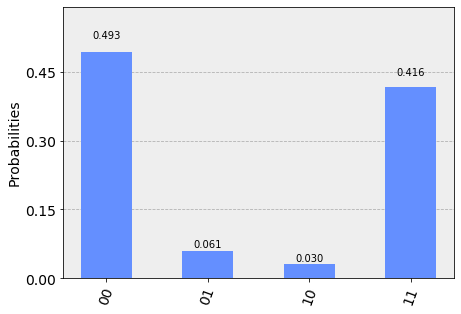

In [27]:
plot_histogram(result.get_counts(circuit))